## Data Set Information:
Seven different types of dry beans were used in this project, taking into account the features 
such as form, shape, type, and structure by the market situation. Use best machine learning 
algorithm to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, 
Cali, Dermason, Horoz, Seker and Sira, depending only on dimension and shape features of 
bean varieties with no external discriminatory features.

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv("data.csv")
data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [4]:
data.isnull()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      False      False            False            False         False   
1      False      False            False            False         False   
2      False      False            False            False         False   
3      False      False            False            False         False   
4      False      False            False            False         False   
...      ...        ...              ...              ...           ...   
13606  False      False            False            False         False   
13607  False      False            False            False         False   
13608  False      False            False            False         False   
13609  False      False            False            False         False   
13610  False      False            False            False         False   

       Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0             False       False          False   False     False      False   
1             False       False          False   False     False      False   
2             False       False          False   False     False      False   
3             False       False          False   False     False      False   
4             False       False          False   False     False      False   
...             ...         ...            ...     ...       ...        ...   
13606         False       False          False   False     False      False   
13607         False       False          False   False     False      False   
13608         False       False          False   False     False      False   
13609         False       False          False   False     False      False   
13610         False       False          False   False     False      False   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0            False         False         False         False         False   
1            False         False         False         False         False   
2            False         False         False         False         False   
3            False         False         False         False         False   
4            False         False         False         False         False   
...            ...           ...           ...           ...           ...   
13606        False         False         False         False         False   
13607        False         False         False         False         False   
13608        False         False         False         False         False   
13609        False         False         False         False         False   
13610        False         False         False         False         False   

       Class  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
13606  False  
13607  False  
13608  False  
13609  False  
13610  False  

[13611 rows x 17 columns]

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
data.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

In [9]:
data.describe

<bound method NDFrame.describe of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidit

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
data.shape

(13611, 17)

In [12]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [13]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [14]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## Exploratory Data Analyses

## Data Visualisation

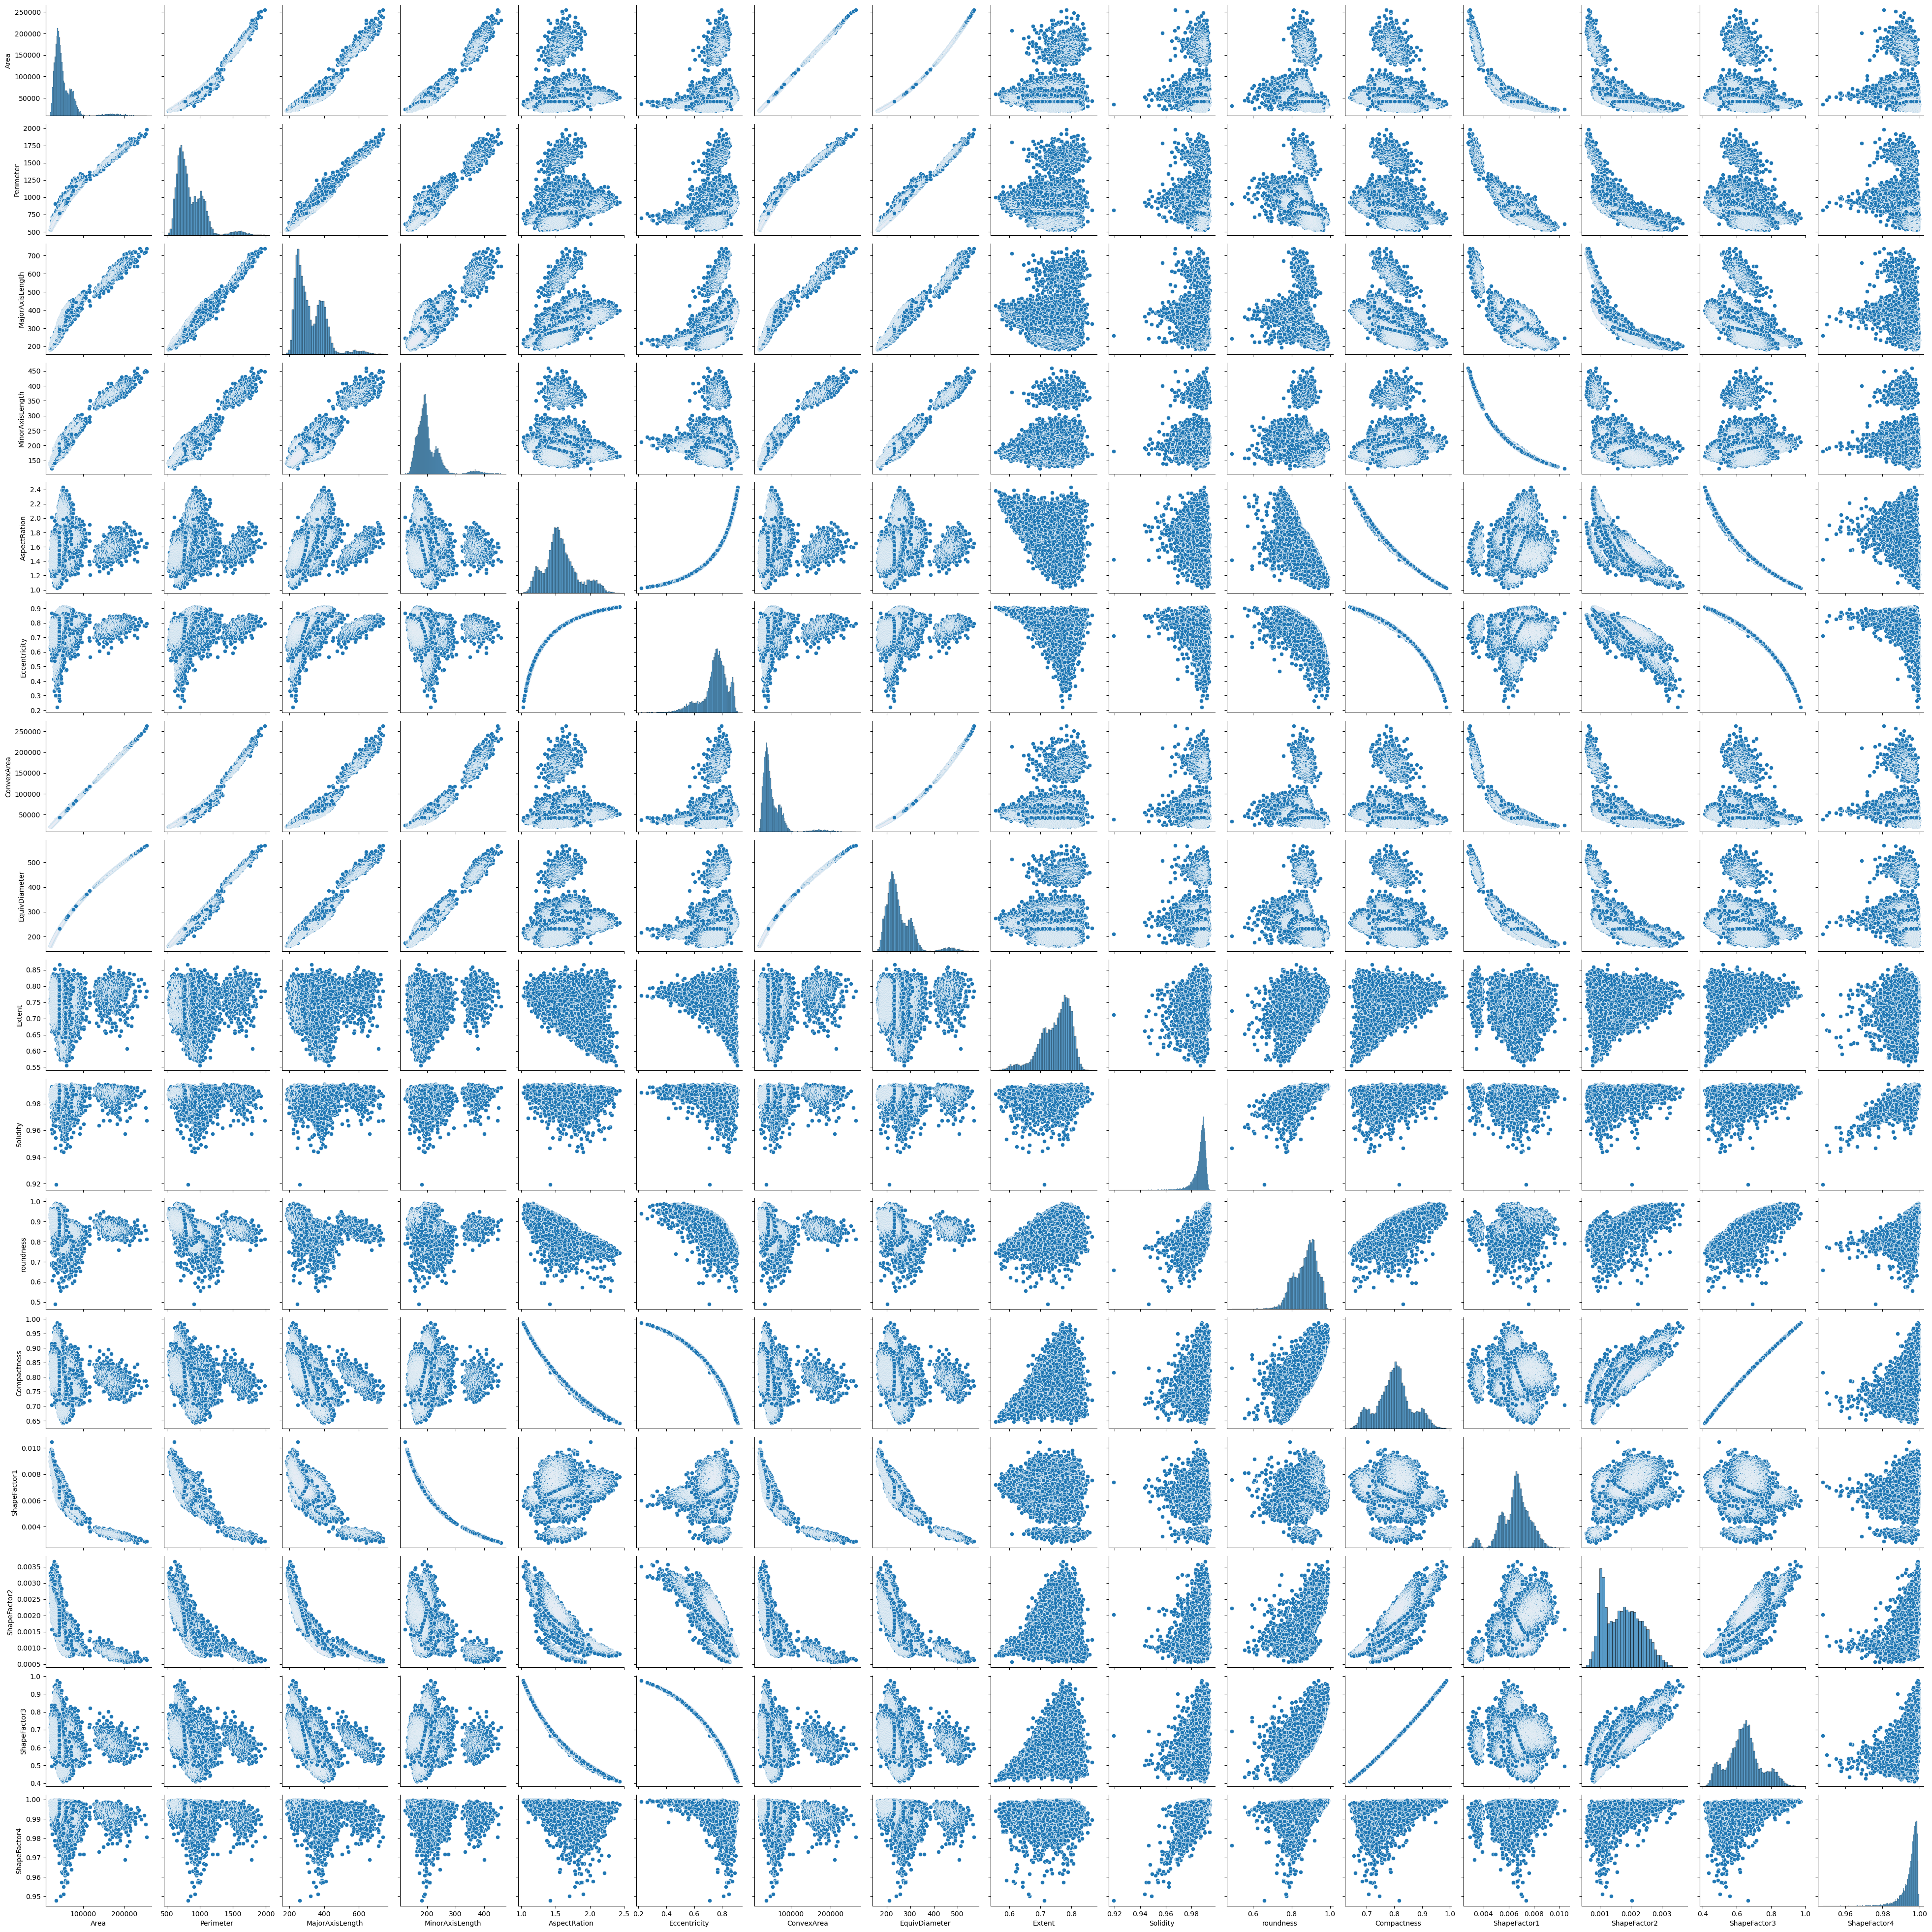

In [65]:
sns.pairplot(data)

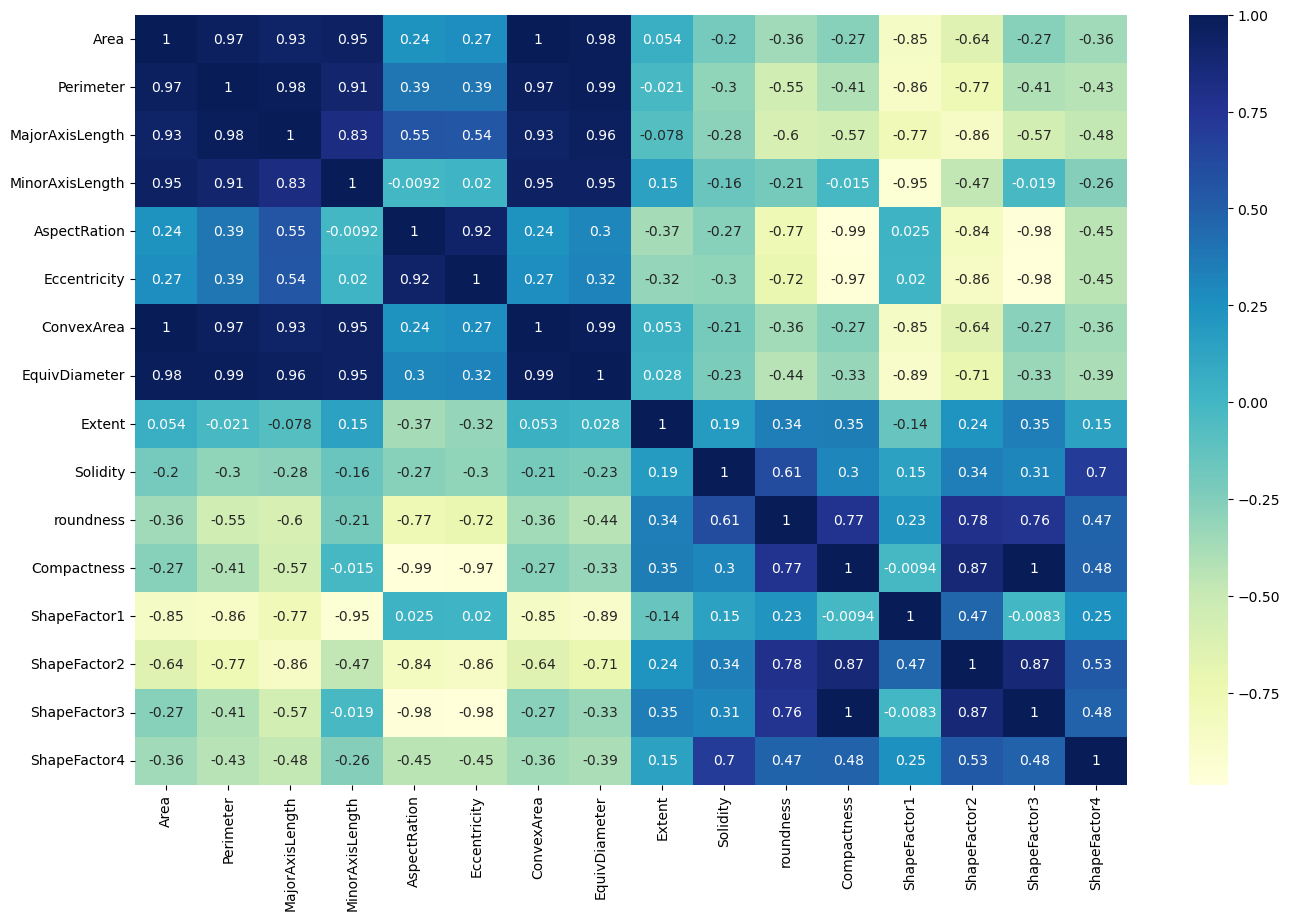

In [66]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

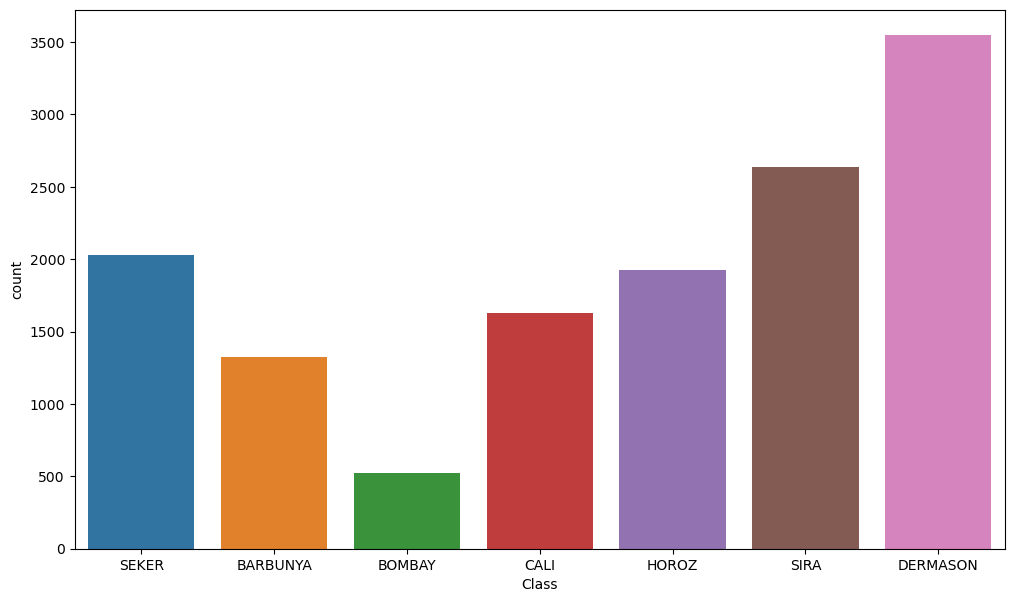

In [67]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class',data=data)
plt.show()

### Histogram

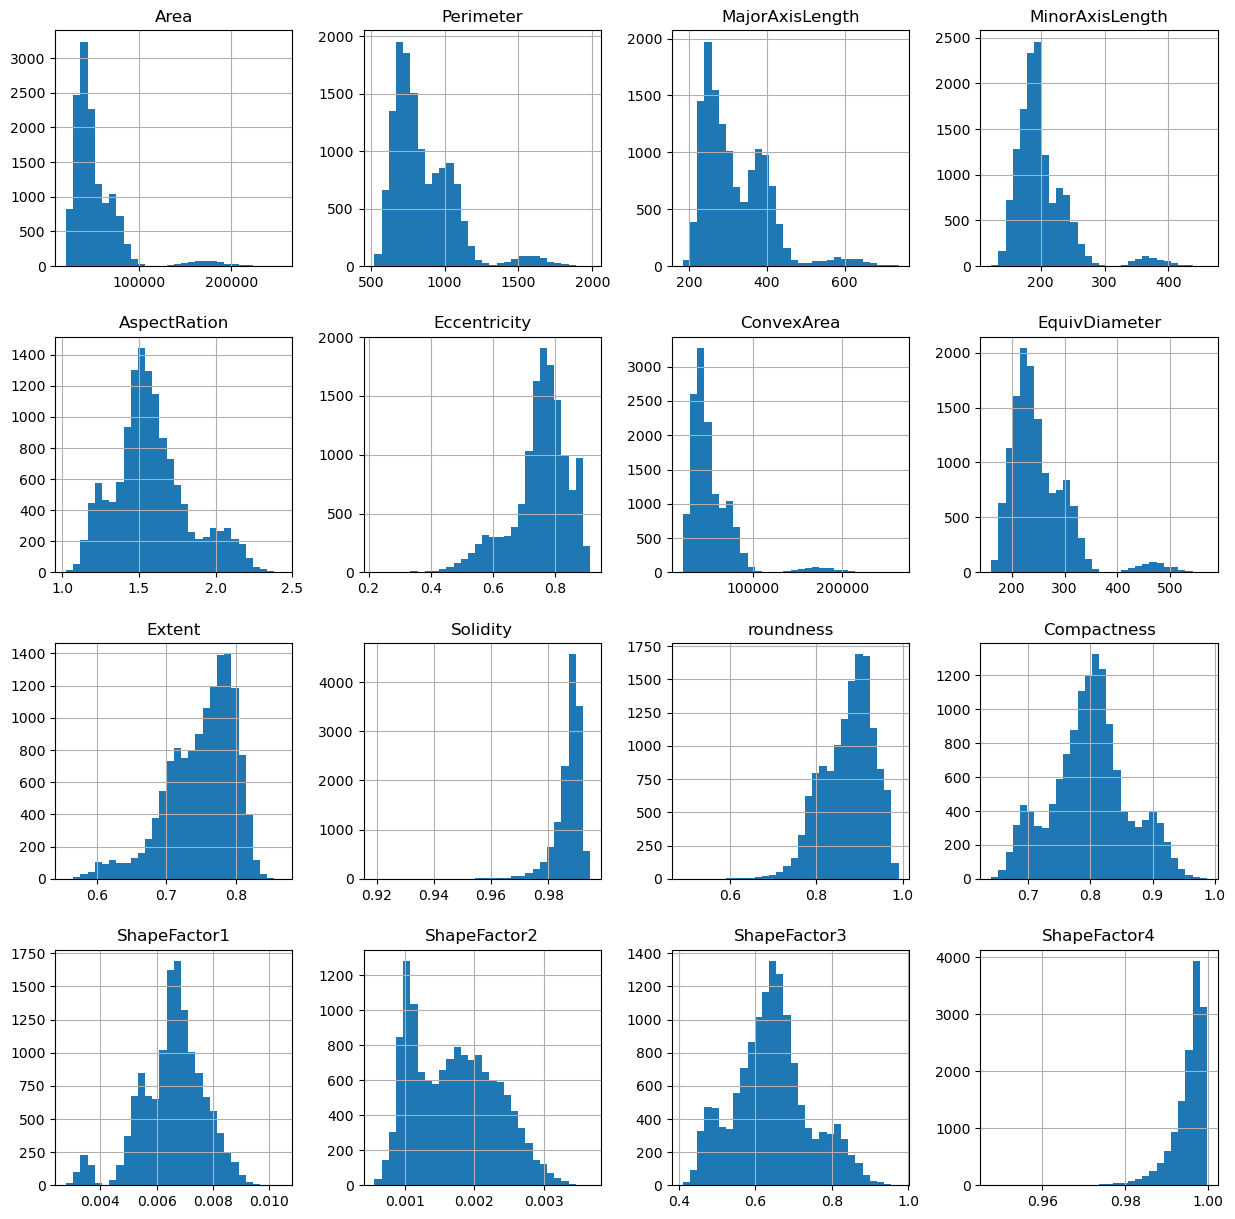

In [68]:
data.hist(bins=30,figsize=(15,15))
plt.show()

### splititing Data intp Train and Test Subsets

In [15]:
X=data.drop(columns='Class')
y=data['Class']

## standard scaling

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [17]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (10888, 16)
X_test :  (2723, 16)
y_train :  (10888,)
y_test :  (2723,)


### Standarizing Features 

In [18]:
from sklearn import preprocessing 
scaler_X=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler_X.transform(X_train)
X_test_scaled=scaler_X.transform(X_test)

## Modelling

## Logistic Regression


In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred

array(['DERMASON', 'SEKER', 'DERMASON', ..., 'BARBUNYA', 'DERMASON',
       'CALI'], dtype=object)

In [30]:
accuracy = lr.score(X_test,y_test)
accuracy

0.702533969886155

### Testing

In [31]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred)
print(cm_lr)

[[132   0  92   0  46   1   2]
 [  0  84   0   0   0   0   0]
 [ 50   1 248   0   7   1   4]
 [  0   0   0 649   6  31  58]
 [  7   0  12  21 229   6 116]
 [  2   0   0  93   8 258  62]
 [  3   0   0  34  69  78 313]]


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.68      0.48      0.57       273
      BOMBAY       0.99      1.00      0.99        84
        CALI       0.70      0.80      0.75       311
    DERMASON       0.81      0.87      0.84       744
       HOROZ       0.63      0.59      0.61       391
       SEKER       0.69      0.61      0.65       423
        SIRA       0.56      0.63      0.60       497

    accuracy                           0.70      2723
   macro avg       0.72      0.71      0.71      2723
weighted avg       0.70      0.70      0.70      2723



## Decision Tree

In [33]:
# Model
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=44)
# fitting
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=44)

In [34]:
# predicting
y_pred = dtree.predict(X_train)
#y_pred

In [35]:
y_pred=dtree.predict(X_train)

acc = accuracy_score(y_train,y_pred)
print("Accuracy : ",acc)

Accuracy :  0.8123622336517267


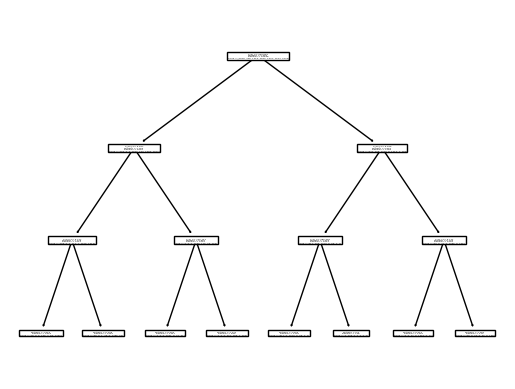

In [36]:
from sklearn import tree
tree.plot_tree(dtree)
plt.show()

## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,random_state=42,max_depth=8,max_features=5,min_samples_leaf=5)
forest.fit(X_train_scaled,y_train)
y_pred=forest.predict(X_test_scaled)

### classification Report and Acuuracy Score

In [38]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy:%.5f'% accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:0.91113
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.86      0.89       273
      BOMBAY       1.00      0.99      0.99        84
        CALI       0.88      0.95      0.91       311
    DERMASON       0.91      0.92      0.91       744
       HOROZ       0.97      0.93      0.95       391
       SEKER       0.95      0.91      0.93       423
        SIRA       0.84      0.87      0.85       497

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[234   0  26   0   2   4   7]
 [  1  83   0   0   0   0   0]
 [ 11   0 296   0   3   1   0]
 [  0   0   0 685   4   9  46]
 [  1   0   8   2 365   0  15]
 [  2   0   1  19   0 384  17]
 [  1   0   6  48   3   5 434]]


### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.12, random_state=0)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9816311535635562
GBCModel Test Score is :  0.9192067572530297


In [48]:
from sklearn.metrics import confusion_matrix
cm_GB= confusion_matrix(y_test,y_pred)
print(cm_GB)

[[234   0  26   0   2   4   7]
 [  1  83   0   0   0   0   0]
 [ 11   0 296   0   3   1   0]
 [  0   0   0 685   4   9  46]
 [  1   0   8   2 365   0  15]
 [  2   0   1  19   0 384  17]
 [  1   0   6  48   3   5 434]]


## Conclusion
I successfully investigated the imported data and done exploratory data analysis. Key information was obtained which was
useful for the rest of the task. Data visualization was performed and correlations were examined.
In addition, Feature Engineering was performed.Logistic Regression,Decision Tree, Random Forest,Gradientboosting Classification model obtained a satisfactory result at the level of 91%. Unfortunately, the results of the model could not be improved by RandomizedSearchCV.